In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
import os

In [5]:
def plot_images(directory,top=10):
    all_item_dirs=os.listdir(directory)
    item_files=[os.path.join(directory,file) for file in all_item_dirs][:5]
    plt.figure(figsize=(20,20))
    for i,img_path in enumerate(item_files):
        plt.subplot(10,10,i+1)
        img=plt.imread(img_path)
        plt.imshow(img,cmap="gray")

In [6]:
ls

Drowseness_Detection.ipynb  test/  train/


In [10]:
data_path="/home/divum/STUDY/Projects/Drowseness Detection/archive (1)/dataset_new/train"
directories=["/Closed","/Open"]

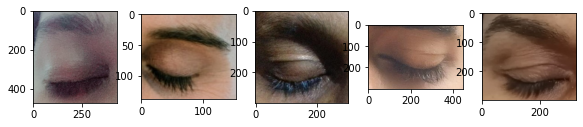

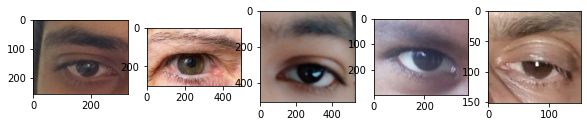

In [11]:
for j in directories:
    plot_images(data_path+j)

In [12]:
batch_size=128
train_datagen=ImageDataGenerator(horizontal_flip=True,rescale=1./255,zoom_range=0.2,validation_split=0.1)
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
train_data_path="/home/divum/STUDY/Projects/Drowseness Detection/archive (1)/dataset_new/train"
test_data_path="/home/divum/STUDY/Projects/Drowseness Detection/archive (1)/dataset_new/test"

In [15]:
train_set=train_datagen.flow_from_directory(train_data_path,target_size=(24,24),
                                           batch_size=batch_size,
                                           color_mode="grayscale",
                                           class_mode="categorical")
test_set=test_datagen.flow_from_directory(test_data_path,target_size=(24,24),
                                         batch_size=batch_size,
                                         color_mode="grayscale",
                                         class_mode="categorical")

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [16]:
classes=2
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(24,24,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(classes,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [19]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [21]:
model_path="Drowseness_Detection.h5"
checkpoint=ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]

In [24]:
num_epochs=100
training_steps=train_set.n//train_set.batch_size
validation_steps=test_set.n//test_set.batch_size

In [25]:
history=model.fit_generator(train_set,epochs=num_epochs,steps_per_epoch=training_steps,validation_data=test_set,validation_steps=validation_steps,callbacks=callbacks_list)

/tmp/ipykernel_162804/1397882043.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_set,epochs=num_epochs,steps_per_epoch=training_steps,validation_data=test_set,validation_steps=validation_steps,callbacks=callbacks_list)
2023-04-05 09:55:57.011105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 0.1030 - accuracy: 0.9665

2023-04-05 09:55:58.748972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from 0.96875 to 0.98438, saving model to Drowseness_Detection.h5
9/9 [==============================] - 2s 225ms/step - loss: 0.1030 - accuracy: 0.9665 - val_loss: 0.0678 - val_accuracy: 0.9844
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 0.0893 - accuracy: 0.9702
Epoch 2: val_accuracy did not improve from 0.98438
9/9 [==============================] - 2s 198ms/step - loss: 0.0893 - accuracy: 0.9702 - val_loss: 0.0950 - val_accuracy: 0.9688
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 0.0890 - accuracy: 0.9620
Epoch 3: val_accuracy did not improve from 0.98438
9/9 [==============================] - 2s 197ms/step - loss: 0.0890 - accuracy: 0.9620 - val_loss: 0.1113 - val_accuracy: 0.9688
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 0.0758 - accuracy: 0.9720
Epoch 4: val_accuracy did not improve from 0.98438
9/9 [==============================] - 2s 189ms/step - loss: 0.0758 - accuracy: 0.97

Epoch 31/100
9/9 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9982
Epoch 31: val_accuracy did not improve from 0.99219
9/9 [==============================] - 2s 216ms/step - loss: 0.0104 - accuracy: 0.9982 - val_loss: 0.0515 - val_accuracy: 0.9844
Epoch 32/100
9/9 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9991
Epoch 32: val_accuracy did not improve from 0.99219
9/9 [==============================] - 2s 216ms/step - loss: 0.0083 - accuracy: 0.9991 - val_loss: 0.0379 - val_accuracy: 0.9922
Epoch 33/100
9/9 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9973
Epoch 33: val_accuracy did not improve from 0.99219
9/9 [==============================] - 2s 224ms/step - loss: 0.0102 - accuracy: 0.9973 - val_loss: 0.0560 - val_accuracy: 0.9688
Epoch 34/100
9/9 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9982
Epoch 34: val_accuracy did not improve from 0.99219
9/9 [========================

Epoch 61/100
9/9 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 61: val_accuracy did not improve from 1.00000
9/9 [==============================] - 20s 2s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 0.9844
Epoch 62/100
9/9 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9973
Epoch 62: val_accuracy did not improve from 1.00000
9/9 [==============================] - 17s 2s/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0407 - val_accuracy: 0.9844
Epoch 63/100
9/9 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9983
Epoch 63: val_accuracy did not improve from 1.00000
9/9 [==============================] - 17s 2s/step - loss: 0.0077 - accuracy: 0.9983 - val_loss: 0.0505 - val_accuracy: 0.9844
Epoch 64/100
9/9 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9973
Epoch 64: val_accuracy did not improve from 1.00000
9/9 [==============================

Epoch 91/100
9/9 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 91: val_accuracy did not improve from 1.00000
9/9 [==============================] - 18s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 92/100
9/9 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 92: val_accuracy did not improve from 1.00000
9/9 [==============================] - 18s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0312 - val_accuracy: 0.9844
Epoch 93/100
9/9 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9991
Epoch 93: val_accuracy did not improve from 1.00000
9/9 [==============================] - 20s 2s/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 94/100
9/9 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 94: val_accuracy did not improve from 1.00000
9/9 [==============================

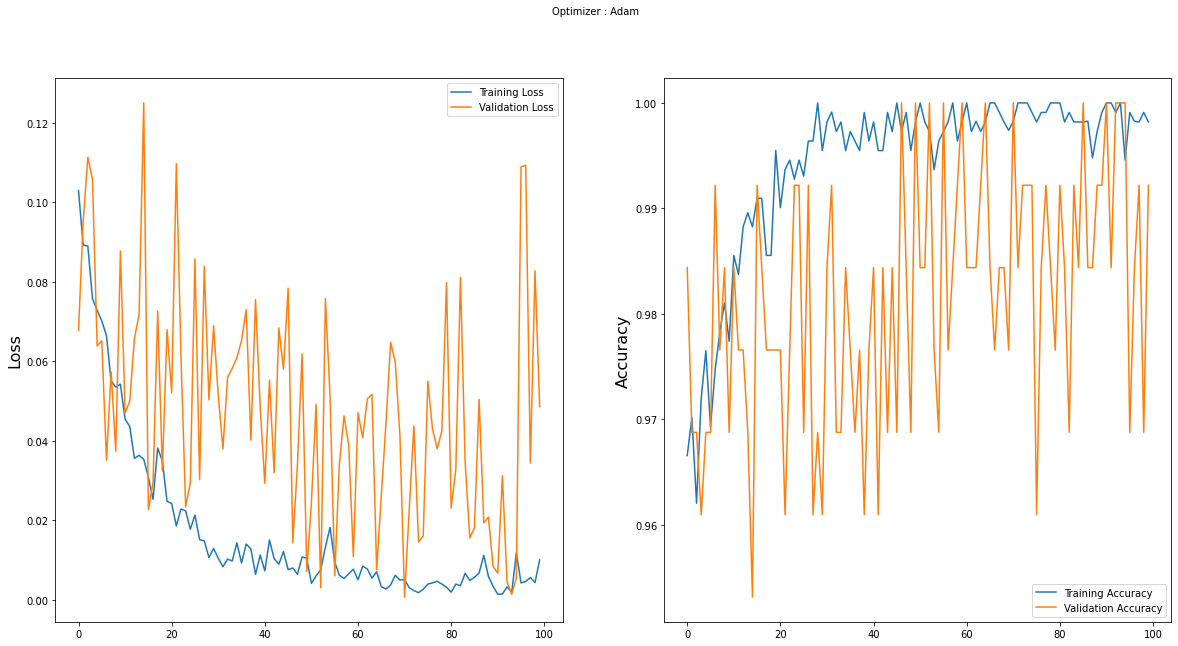

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()